In [27]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk

# Load the data
try:
    df = pd.read_csv(r"C:\Users\moham\twitter_sentiment_analysis\data\sentiment_analysis.csv")

    print("Data Loaded Successfully")
except FileNotFoundError:
    print("Error: The file 'data/sentiment_analysis.csv' was not found.")


Data Loaded Successfully


Dataset Overview and Basic Statistics

In [29]:
# Display the first few rows of the dataset to understand its structure
df.head()


,TweetID,Text,CreatedAt,CleanedText,Sentiment
0,1854316068401209636,RT @moneycaa: oh btw middle schoolers can’t re...,NaN,rt oh btw middle schoolers cant read high sch...,positive
1,1854316068275204258,"e foi esse o único jeito q eu achei de lidar, ...",NaN,e foi esse o único jeito q eu achei de lidar e...,neutral
2,1854316067780186183,@httpsrealitys Ela jurou que esse personagem a...,NaN,ela jurou que esse personagem aí tá agradando\...,neutral
3,1854316067365232966,RT @Bubola: PLEASE TELL ME THIS IS NOT AI,NaN,rt please tell me this is not ai,neutral
4,1854316066660667437,RT @moneycaa: oh btw middle schoolers can’t re...,NaN,rt oh btw middle schoolers cant read high sch...,positive


In [30]:
# Basic information about the dataset
print("Dataset Overview:")
print(f"Number of tweets: {df.shape[0]}")

# Display column information
print("\nColumn Info:")
df.info()


Dataset Overview:
Number of tweets: 100

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TweetID      100 non-null    int64  
 1   Text         100 non-null    object 
 2   CreatedAt    0 non-null      float64
 3   CleanedText  100 non-null    object 
 4   Sentiment    100 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 4.0+ KB


In [31]:
# Show a quick statistical summary
print("\nStatistical Summary of Data:")
print(df.describe(include='all'))



Statistical Summary of Data:
             TweetID                                               Text  \
count   1.000000e+02                                                100   
unique           NaN                                                 80   
top              NaN  RT @moneycaa: oh btw middle schoolers can’t re...   
freq             NaN                                                 13   
mean    1.854316e+18                                                NaN   
std     7.099073e+09                                                NaN   
min     1.854316e+18                                                NaN   
25%     1.854316e+18                                                NaN   
50%     1.854316e+18                                                NaN   
75%     1.854316e+18                                                NaN   
max     1.854316e+18                                                NaN   

        CreatedAt                                        CleanedText 

Sentiment Distribution Visualization

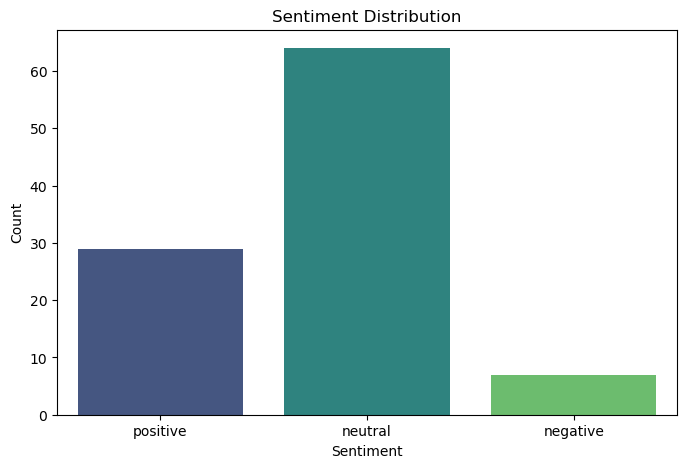

In [33]:
# Visualize the sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


Word Clouds for Each Sentiment

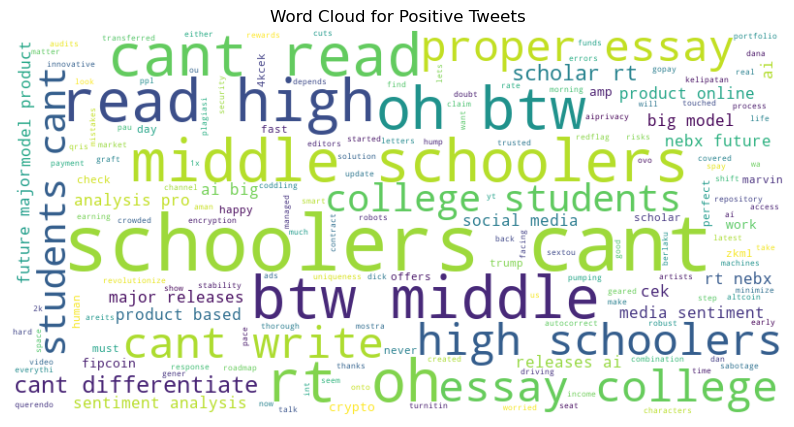

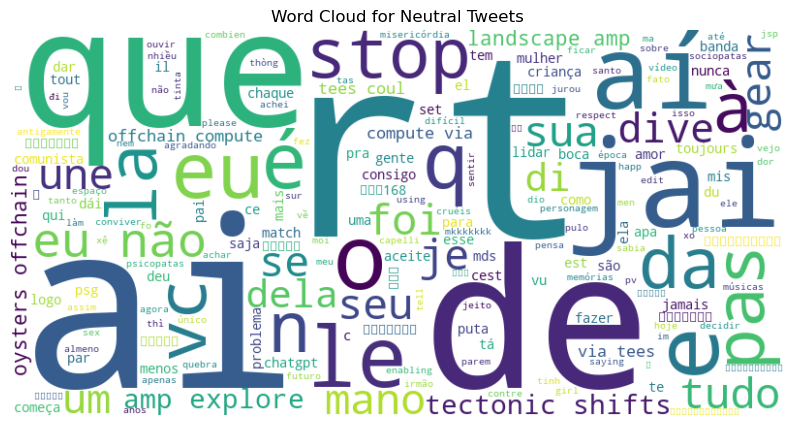

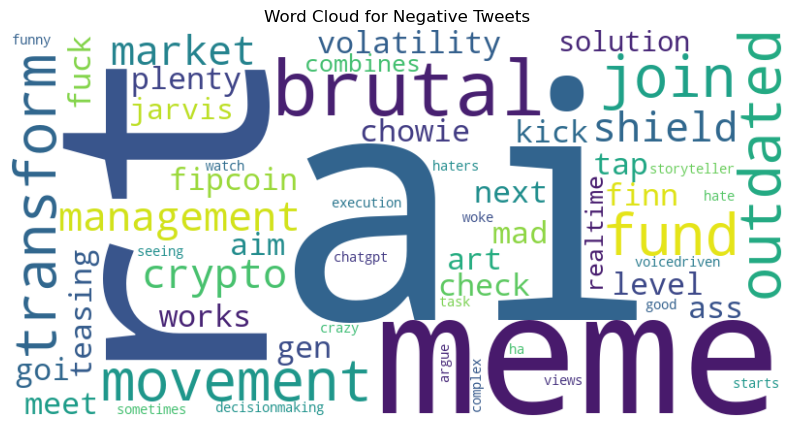

In [34]:
# Generate and display word clouds for each sentiment category
for sentiment in ['positive', 'neutral', 'negative']:
    sentiment_words = ' '.join(df[df['Sentiment'] == sentiment]['CleanedText'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentiment_words)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Tweets')
    plt.axis('off')
    plt.show()


Top Words by Sentiment (Excluding Stop Words)

In [35]:
# Download stopwords if not already downloaded
nltk.download('stopwords')
from nltk.corpus import stopwords

# Define a set of stopwords
stop_words = set(stopwords.words('english'))

# Function to get the most common words
def get_top_words(text_series, num_words=10):
    words = ' '.join(text_series).split()
    words = [word for word in words if word not in stop_words]
    return Counter(words).most_common(num_words)

# Display top words in each sentiment
for sentiment in ['positive', 'neutral', 'negative']:
    top_words = get_top_words(df[df['Sentiment'] == sentiment]['CleanedText'])
    print(f"\nTop words in {sentiment} tweets:")
    for word, count in top_words:
        print(f"{word}: {count}")



Top words in positive tweets:
cant: 40
schoolers: 26
rt: 24
ai: 15
oh: 13
btw: 13
middle: 13
read: 13
high: 13
write: 13

Top words in neutral tweets:
rt: 38
ai: 31
de: 19
que: 14
jai: 13
eu: 9
aí: 9
e: 7
le: 6
amp: 6

Top words in negative tweets:
ai: 7
rt: 6
brutal: 2
join: 1
movement: 1
transform: 1
outdated: 1
fund: 1
management: 1
shield: 1


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Step 1: Check if CreatedAt Conversion Worked
Ensure that CreatedAt was converted to a datetime format and that there are no NaT (Not a Time) values.

In [36]:
# Check if 'CreatedAt' column has any NaT values
print("Missing dates in 'CreatedAt' column:", df['CreatedAt'].isna().sum())

# Display first few rows to confirm conversion
df[['CreatedAt', 'Sentiment']].head()


# Check the first few rows of daily_sentiment to see its structure
print(daily_sentiment.head())

# Check data types in daily_sentiment to confirm they are numeric
print(daily_sentiment.dtypes)



Missing dates in 'CreatedAt' column: 100
Empty DataFrame
Columns: []
Index: []
Series([], dtype: object)


Re-create daily_sentiment Using Counts: Try the following code to aggregate counts correctly:

In [37]:
# Convert 'CreatedAt' to datetime format and extract date if necessary
df['CreatedAt'] = pd.to_datetime(df['CreatedAt'], errors='coerce')

# Group by date and sentiment, then count occurrences
daily_sentiment = df.groupby([df['CreatedAt'].dt.date, 'Sentiment']).size().unstack().fillna(0)

# Display the structure of daily_sentiment to confirm it has numeric data
print(daily_sentiment.head())
print(daily_sentiment.dtypes)


Empty DataFrame
Columns: []
Index: []
Series([], dtype: object)


Plot the Data: With the correctly formatted daily_sentiment, try plotting it again.

If there are missing values, ensure CreatedAt is properly formatted in your dataset. If necessary, remove rows with missing dates:

In [38]:
# Drop rows where 'CreatedAt' is NaT
df = df.dropna(subset=['CreatedAt'])


Step 2: Ensure Sentiment Counts Are Numeric
After grouping by date and sentiment, daily_sentiment should be a numeric DataFrame. Check the structure of daily_sentiment:

In [39]:
# Check the structure of daily_sentiment
daily_sentiment = df.groupby([df['CreatedAt'].dt.date, 'Sentiment']).size().unstack().fillna(0)
print(daily_sentiment.head())
print(daily_sentiment.dtypes)


Empty DataFrame
Columns: []
Index: []
Series([], dtype: object)


Step 1: Verify CreatedAt and Sentiment Columns
Check the contents of CreatedAt and Sentiment columns to ensure they have data.

In [40]:
# Check if 'CreatedAt' contains any valid dates
print("Unique values in 'Sentiment':", df['Sentiment'].unique())
print("Number of missing dates in 'CreatedAt':", df['CreatedAt'].isna().sum())
print("First few rows of 'CreatedAt' and 'Sentiment':")
print(df[['CreatedAt', 'Sentiment']].head(10))


Unique values in 'Sentiment': []
Number of missing dates in 'CreatedAt': 0
First few rows of 'CreatedAt' and 'Sentiment':
Empty DataFrame
Columns: [CreatedAt, Sentiment]
Index: []


Step 2: Filter Out Missing Data
If there are missing values in CreatedAt or invalid values in Sentiment, filter them out:

In [41]:
# Filter out rows with NaT in 'CreatedAt' and unexpected sentiment values
valid_sentiments = ['positive', 'neutral', 'negative']
df = df.dropna(subset=['CreatedAt'])
df = df[df['Sentiment'].isin(valid_sentiments)]


Step 3: Group and Aggregate Again
After filtering, re-run the grouping and aggregation:

In [42]:
# Group by date and sentiment, count occurrences
daily_sentiment = df.groupby([df['CreatedAt'].dt.date, 'Sentiment']).size().unstack().fillna(0)

# Display daily_sentiment to confirm it contains data
print(daily_sentiment.head())
print(daily_sentiment.dtypes)


Empty DataFrame
Columns: []
Index: []
Series([], dtype: object)


Step 4: Plot the Data
Now, attempt to plot daily_sentiment:

In [43]:
# Plot the sentiment trend over time
if not daily_sentiment.empty:
    daily_sentiment.plot(kind='line', figsize=(12, 6))
    plt.title('Sentiment Trend Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Tweets')
    plt.show()
else:
    print("No data available to plot.")


No data available to plot.
